**IMPORT DATASET**

---



In [21]:
#Import Library yang akan dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import levene
from statsmodels.stats.proportion import proportions_ztest
import copy


In [22]:
path_database = "/content/drive/MyDrive/insurance.csv"

In [ ]:
df = pd.read_csv(path_database)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**ANALISA STATISTIK DESKRIPTIF**

---


Analisa statistik deskriptif bertujuan untuk merangkum
karakter-karakter berdasarkan data. Proses merangkum ini dapat dilakukan dengan eksplorasi data. Ekplorasi data berguna untuk mengetahui insight atau informasi dari sebuah data misalnya persebaran data, menghitung rata-rata, mengetahui nilai tertinggi dan terendah pada sebuah data.


Berikut data yang akan dieksplorasi sebagai berikut:


1. Rata-rata umur nasabah asuransi
2. Rata-rata nilai BMI dari nasabah yang perokok
3. Rata-rata umur nasabah yang perokok
4. Rata-rata umur nasabah perempuan perokok dengan nasabah laki-laki perokok
5. Jumlah tagihan berdasarkan nasabah perokok dengan nasabah non perokok





In [ ]:
#1. Rata-rata Umur Nasabah Asuransi
mean_age = df['age'].mean()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


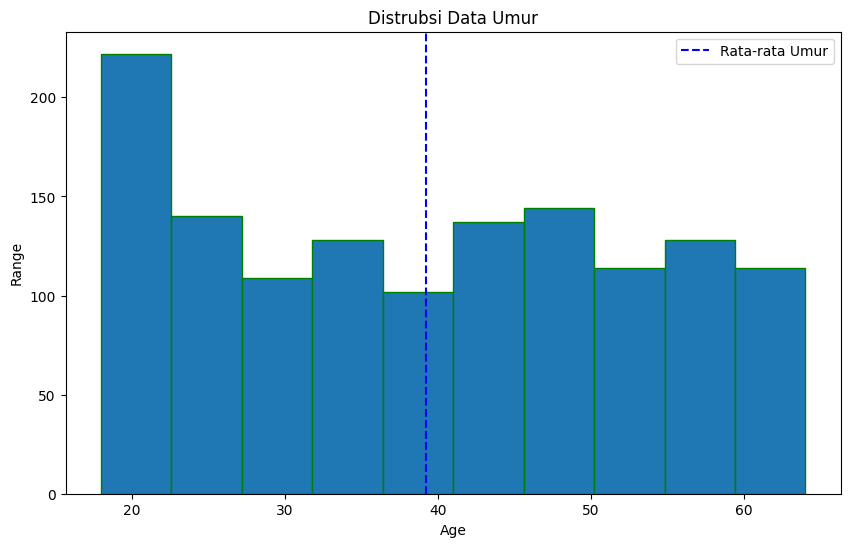

In [ ]:
#Visualisasi data dengan Matplotlib
plt.figure(figsize=(10,6))
plt.hist(df['age'],bins=10, edgecolor='green')
plt.axvline(mean_age,color='blue',linestyle='dashed',linewidth=1.5, label="Rata-rata Umur")
plt.xlabel('Age')
plt.ylabel('Range')
plt.title('Distrubsi Data Umur')
plt.legend()
#plt.savefig("img/distibusi-data-umur.jpeg")
plt.show()

In [ ]:
#2. Rata-rata Nilai BMI dari Nasabah yang Perokok
df['bmi'].groupby(df['smoker']).mean()

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

In [ ]:
#3. Rata-rata Umur Nasabah yang Perokok
df['age'].groupby(df['smoker']).mean()

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64

In [ ]:
#4. Rata-rata Umur Nasabah Perempuan Perokok dan Nasabah Laki-laki Perokok
df.groupby(['sex', 'smoker']).mean('age')

age        bmi  children       charges
sex    smoker                                              
female no      39.691042  30.539525  1.087751   8762.297300
       yes     38.608696  29.608261  1.008696  30678.996276
male   no      39.061896  30.770580  1.092843   8087.204731
       yes     38.446541  31.504182  1.188679  33042.005975

In [ ]:
#5. Jumlah Tagihan Nasabah Perokok dengan Nasabah Nonperokok
df['charges'].groupby(df['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

**ANALISA VARIABEL KATEGORIK**

---

Dataset diolah untuk memperdalam analisa. Analisa data digunakan dengan identifikasi peluang berdasarkan kondisi tertentu. Berikut analisa data variable kategorik:


1. Tagihan asuransi berdasarkan gender
2. Tagihan asuransi pada tiap daerah
3. Proporsi data pada tiap daerah
4. Proporsi nasabah perokok dan nasabah nonperokok
5. Peluang seseorang adalah nasabah perempuan yang perokok



In [ ]:
#1. Tagihan Asuransi berdasarkan Gender
df['charges'].groupby(df['sex']).sum()

sex
female    8.321061e+06
male      9.434764e+06
Name: charges, dtype: float64

In [ ]:
#2. Tagihan Asuransi di Tiap Daerah
df['charges'].groupby(df['region']).sum()

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

In [ ]:
#3. Proposi Data di Tiap Daerah
df['charges'].groupby(df['region']).describe()


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


In [ ]:
df['sex'].groupby(df['region']).describe()


,count,unique,top,freq
region,,,,
northeast,324,2,male,163
northwest,325,2,female,164
southeast,364,2,male,189
southwest,325,2,male,163


In [ ]:
#4. Proporsi Data Nasabah Perokok dengan Nasabah Nonperokok
df.groupby(['smoker']).agg('count')

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='children', y='region', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#5. Peluang Seseorang adalah Nasabah Perempuang yang Perokok

#Menghitung nasabah yg perokok
n_smokers = df['smoker'].where(df['smoker']=='yes').value_counts()

#Menghitung nasabah perempuan perokok
n_female_smoker = df['smoker'].where(df['sex']=='female').value_counts()

#Menghitung peluang seseorang adalah perempuan dan dia adalah perokok
smoker_female_smoker= n_female_smoker[1]/n_smokers
print(f"Peluang seseorang adalah perempuan dan dia adalah perokok: {smoker_female_smoker:}")

Peluang seseorang adalah perempuan dan dia adalah perokok: yes    0.419708
Name: smoker, dtype: float64


**ANALISA VARIABEL KONTINYU**

---

1. Mana yang lebih mungkin terjadi:

    a. Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas $16.700, atau

    b. Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas $16.700


2. Mana yang lebih mungkin terjadi:

    a. Seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas $16.700, atau

    b. Seseorang nonperokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas $16.700



In [ ]:
#Menghitung jumlah tagihan nasabah di atas 16700k
n_sample= df[df['charges'] > 16700].value_counts().sum()
print(f'Jumlah orang yang mendapatkan tagihan di atas $16.700 adalah {n_sample:.0f} orang')

#Menghitung BMI di atas 25 dan tagihan di tagihan di atas $16.700
#Menghitung jumlah nasabah dengan BMI di atas 25
data_a= df.where((df['bmi'] > 25) & (df['charges']>16700)).value_counts().sum()
print(f"Peluang seseorang dengan BMI di atas 25 dengan tagihan di atas $16.700 adalah {data_a:.0f} orang")

#Menghitung peluang seseorang dengan BMI di atas 25 dan tagihan di atas $16.700
peluang_a= data_a/n_sample
print(f"Peluang nasabah dengan BMI di atas 25 dan tagihan di atas $16.700 adalah {peluang_a:.2f}")

#Menghitung BMI di bawah 25 dan tagihan di atas $16.700
#Menghitung jumlah nasabah dengan BMI di bawah 25
data_b= df.where((df['bmi'] < 25) & (df['charges']>16700)).value_counts().sum()
print(f"Peluang seseorang dengan BMI di bawah 25 dengan tagihan di atas $16.700 adalah {data_b:.0f} orang")

#Menghitung peluang seseorang dengan BMI di bawah 25 dan tagihan di atas 16700
peluang_b= data_b/n_sample
print(f"Peluang nasabah dengan BMI di bawah 25 dan tagihan di atas $16.700 adalah {peluang_b:.2f}")






Jumlah orang yang mendapatkan tagihan di atas $16.700 adalah 334 orang
Peluang seseorang dengan BMI di atas 25 dengan tagihan di atas $16.700 adalah 283 orang
Peluang nasabah dengan BMI di atas 25 dan tagihan di atas $16.700 adalah 0.85
Peluang seseorang dengan BMI di bawah 25 dengan tagihan di atas $16.700 adalah 51 orang
Peluang nasabah dengan BMI di bawah 25 dan tagihan di atas $16.700 adalah 0.15


In [ ]:
#Menghitung jumlah nasabah yang BMI di atas 25 dan tagihannya di atas $16.700
n_data = df[df['bmi']>25].where(df['charges']>16700).value_counts().sum()
print(f"Jumlah nasabah yang BMI di atas 25 dan tagihannya di atas 16700K {n_data:.0f} orang")

#Menghitung nasabah perokok yang BMI di atas 25 dan tagihannya di atas $16.700
data_1 = df.where((df['smoker']=='yes') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
print(f"Jumlah nasabah perokok yang BMI di atas 25 dengan tagihan di atas $16.700 {data_1:.0f} orang")

#Peluang nasabah perokok yang BMI di atas 25 dan tagihan di atas $16.700
p_smoker = data_1/n_data
print(f"Peluang nasabah perokok yang BMI di atas 25 dan tagihannya di atas $16.700 {p_smoker:.2f}")

#Menghitung nasabah nonperokok yang BMI di atas 25 dengan tagihan di atas $16.700
data_2 = df.where((df['smoker']=='no') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
print(f"Jumlah nasabah nonperokok yang BMI di atas 25 dengan tagihan di atas $16.700 {data_2:.0f} orang")

#Peluang nasabah nonperokok yang BMI di atas 25 dengan tagihan di atas $16.700
p_no_smoker = data_2/n_data
print(f"Peluang nasabah nonperokok yang BMI di atas 25 dengan tagihan di atas $16.700 {p_no_smoker:.2f}")

Jumlah nasabah yang BMI di atas 25 dan tagihannya di atas 16700K 283 orang
Jumlah nasabah perokok yang BMI di atas 25 dengan tagihan di atas $16.700 215 orang
Peluang nasabah perokok yang BMI di atas 25 dan tagihannya di atas $16.700 0.76
Jumlah nasabah nonperokok yang BMI di atas 25 dengan tagihan di atas $16.700 68 orang
Peluang nasabah nonperokok yang BMI di atas 25 dengan tagihan di atas $16.700 0.24


**ANALISA KORELASI VARIABEL**

---
Variabel-variabel yang telah dianalisis dicari keterikatannya satu sama lain dengan method corr(). Pada method corr, data yang hanya bersifat numerikal yang dapat dicari keterikatannya satu dengan lainnya. Variabel-variabel yang akan dicari keterikatannya yaitu umur, bmi, jumlah anak dan tagihan asuransi.



<ipython-input-28-5e5151d4d1f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df= df[['age', 'sex','bmi','charges',]].corr(method='pearson')


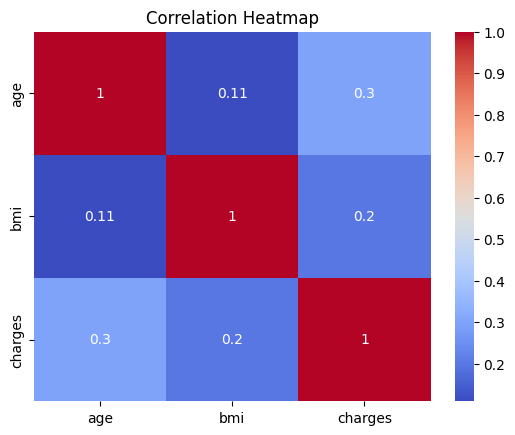

In [ ]:
correlation_df= df[['age', 'sex','bmi','charges',]].corr(method='pearson')

#Visualisasi data dengan heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Hasil korelasi antar variabel berkorelasi positif dengan nilai korelasi yang berbeda-beda. Korelasi yang memiliki nilai besar yaitu variabel tagihan dengan usia sebesar 0,3. Selanjutnya korelasi dari variable bmi dan tagihan sebesar 0,2.

**PENGUJIAN HIPOTESA**

---




In [ ]:
Pada pengujian hipotesa ini akan menguji 3 populasi pada data. Berikut pengujian hipotesa sebagai berikut:
1. Tagihan asuransi berdasarkan nasabah Perokok dan Nonperokok
2. Tagihan asuransi berdasarkan gender

In [ ]:
#1. Tagihan asuransi berdasarkan nasabah perokok dan nonperokok

#H0: "Tagihan asuransi nasabah perokok > tagihan asuransi nasabah nonperokok"
#H1: "Tagihan asuransi nasabah perokok < tagihan asuransi nasabah nonperokok"

#Pengelompokan data

#Pengelompokan data tagihan asuransi berdasarkan nasabah perokok
smokers= df[df['smoker']=='yes']['charges']
#print(f"Jumlah data tagihan dari nasabah perokok: {smokers}")

#Banyaknya jumlah data sampel tagihan asuransi berdasarkan nasabah perokok
n_smoker=df['charges'].where(df['smoker']=='yes').value_counts().sum()
print(f"Banyaknya data sampel tagihan asuransi berdasarkan nasabah perokok: {n_smoker:.0f}")

#Pengelompokan data tagihan asuransi berdasarkan nasabah nonperokok
non_smoker=df[df['smoker']=='no']['charges']
#print(f"Jumlah data tagihan dari nasabah perokok: {non_smoker}")


#Banyaknya jumlah data sampel tagihan asuransi berdasarkan nasabah nonperokok
n_nonsmoker= df['charges'].where(df['smoker']=='no').value_counts().sum()
print(f"Banyaknya data sampel tagihan asuransi berdasarkan nasabah nonperokok: {n_nonsmoker:.0f}")

#Tingkat siginifikansi
alpha = 0.05

#Uji Statistik
t_statistic, p_value= stats.ttest_ind(smokers, non_smoker)
print('uji t-statistik:{}'.format(t_statistic))
print('p_value:{}'.format(p_value))

if p_value < alpha:
  print("H0 ditolak. Tagihan asuransi nasabah perokok > tagihan asuransi nasabah nonperokok.")
else:
  print("H0 diterima.Tagihan asuransi nasabah perokok < tagihan asuransi nasabah nonperokok.")




Banyaknya data sampel tagihan asuransi berdasarkan nasabah perokok: 274
Banyaknya data sampel tagihan asuransi berdasarkan nasabah nonperokok: 1064
uji t-statistik:46.66492117272371
p_value:8.271435842179102e-283
H0 ditolak. Tagihan asuransi nasabah perokok > tagihan asuransi nasabah nonperokok.


In [ ]:
#2. Tagihan asuransi berdasarkan gender

#H0: "Tagihan asuransi nasabah laki-laki > tagihan asuransi nasabah perempuan"
#H1: "Tagihan asuransi nasabah laki-laki < tagihan asuransi nasabah perempuan"

#Pengelompokan data

#Pengelompokan data tagihan asuransi berdasarkan nasabah perempuan
female= df[df['sex']=='female']['charges']
#print(f"Jumlah data tagihan dari nasabah perempuan: {female}")

#Jumlah tagihan berdasarkan gender
charge_by_gender=df['charges'].groupby(df['sex']).mean()
print(f"Tagihan berdasarkan: {charge_by_gender}")

#Pengelompokan data tagihan asuransi berdasarkan nasabah laki-laki
male=df[df['sex']=='male']['charges']
#print(f"Jumlah data tagihan dari nasabah laki-laki: {male}")

#Tingkat siginifikansi
alpha = 0.05

#Uji Statistik
t_statistic, p_value= stats.ttest_ind(female, male)
print('uji t-statistik:{}'.format(t_statistic))
print('p_value:{}'.format(p_value))

if p_value < alpha:
  print("H0 ditolak. Tagihan asuransi nasabah laki-laki > tagihan asuransi nasabah perempuan.")
else:
  print("H0 diterima. Tagihan asuransi nasabah laki-laki < tagihan asuransi nasabah perempuan.")




Tagihan berdasarkan: sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
uji t-statistik:-2.097546590051688
p_value:0.03613272100592976
H0 ditolak. Tagihan asuransi nasabah laki-laki > tagihan asuransi nasabah perempuan.
